# Task 3.3

**Hypothesis Testing**
- *Repeat Task 3.2 using a different model for each dataset. Use hypothesis testing to compare the performance of the models developed in this task and Task 3.2.*
- *Markdown Question: What was the hypothesis you rejected for both datasets in this task? How does p-value affect your decision?*


## Table of Contents
- [Introduction](#Introduction)
- [Imports](#Imports)
- [Star Dataset](#Star-Dataset)
    - [Train and evaluate a Gradient Boosting classifier using the holdout method](#Train-and-evaluate-a-Gradient-Boosting-classifier-using-the-holdout-method)
    - [Train and evaluate a Gradient Boosting classifier using cross-validation](#Train-and-evaluate-a-Gradient-Boosting-classifier-using-cross-validation)
    - [Perform Gradient Boosting classifier hyperparameter tuning](#Perform-Gradient-Boosting-classifier-hyperparameter-tuning)
    - [Import SVM classifier from task 3.2](#Import-SVM-classifier-from-task-3.2)
    - [Use hypothesis testing to compare the performance of the two classifiers](#Use-hypothesis-testing-to-compare-the-performance-of-the-two-classifiers)
- [GWP Dataset](#GWP-Dataset)
    - [Train and evaluate a Multi-Layer Perceptron regressor using the holdout method](#Train-and-evaluate-a-Multi-Layer-Perceptron-regressor-using-the-holdout-method)
    - [Train and evaluate a Multi-Layer Perceptron regressor using cross-validation](#Train-and-evaluate-a-Multi-Layer-Perceptron-regressor-using-cross-validation)
    - [Perform Multi-Layer Perceptron regressor hyperparameter tuning](#Perform-Multi-Layer-Perceptron-regressor-hyperparameter-tuning)
    - [Import Random Forest regressor from task 3.2](#Import-Random-Forest-regressor-from-task-3.2)
    - [Use hypothesis testing to compare the performance of the two regressors](#Use-hypothesis-testing-to-compare-the-performance-of-the-two-regressors)
- [Markdown Question](#Markdown-Question)

## Introduction <a class="anchor" id="Introduction"></a>

This notebook was completed by B921400 on 14/05/2023 and is intended to fulfill and exceed the requirements of task 3.3 of the 22COC131 coursework. The first section of the notebook fulfills one of the requirements of the task by repeating task 3.2 for the star dataset, but this time training and evaluating a Gradient Boosting classifier instead. Again, to exceed the task's requirements, hyperparameter optimisation was performed on the Gradient Boosting classifier and the tuned model was evaluated. Another requirement of the task was fulfilled by importing the tuned Support Vector Machine classifier from task 3.2 and using hypothesis testing (a paired t-test) to compare whether the difference performance of the two tuned models were statistically significant.

The same process was also applied to the GWP dataset - a Multi-Layer Perceptron regressor was trained and evaluated using both the holdout method and cross-validation, then hyperparameter optimisation was performed. The tuned Random Forest regressor was imported from task 3.2 and a paired t-test was used to compare the performance of the two models. This notebook is concluded by responding to the markdown question. Several functions were also created to improve the reusability and readability of the code, including `perform_hypothesis_test` which performs a paired t-test and returns the p-value and whether the null hypothesis was rejected, and functions to create tuned models for both datasets.

## Imports <a class="anchor" id="Imports"></a>

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPRegressor

from preprocessing_utils import preprocess_star_dataset, preprocess_gwp_dataset
from evaluation_utils import evaluate_classification_model, evaluate_regression_model, perform_cross_validation, perform_hypothesis_test
from model_utils import create_train_test_split, tune_hyperparameters, create_tuned_star_svc, create_tuned_gwp_rf

## Star Dataset <a class="anchor" id="Star-Dataset"></a>

First, let's use the function created in task 3.1 to preprocess the star dataset.

In [3]:
star_X, star_Y = preprocess_star_dataset('star_assessment.csv')
class_labels = ['GALAXY', 'QSO', 'STAR']

#### Train and evaluate a Gradient Boosting classifier using the holdout method <a class="anchor" id="Train-and-evaluate-a-Gradient-Boosting-classifier-using-the-holdout-method"></a>

In this task, a Gradient Boosting classifier will be used which is a supervised machine learning algorithm that can be used for classification (a version also exists for regression). Therefore, the first step is to split the dataset into training and testing sets using SciKit-Learn's `train_test_split` function. Like task 3.2, the `stratify` parameter is used to ensure that the training and testing sets have the same class distribution as the original dataset.

In [4]:
star_x_train, star_x_test, star_y_train, star_y_test = create_train_test_split(star_X, star_Y, stratify=True)

Next, we can create a Gradient Boosting classifier and train it on the training set. Using the `evaluate_classification_model` function created in task 3.2, the model can be evaluated on the testing set by computing the accuracy, precision, recall, and F1 score, as well as plotting a confusion matrix, a precision-recall curve and a ROC curve.

Accuracy: 0.9733107516206272
Precision: 0.9665036695879253
Recall: 0.941084858968079
F1-score: 0.9528800469817246


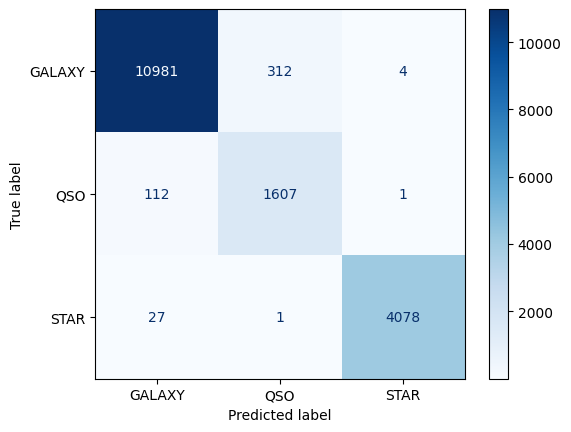

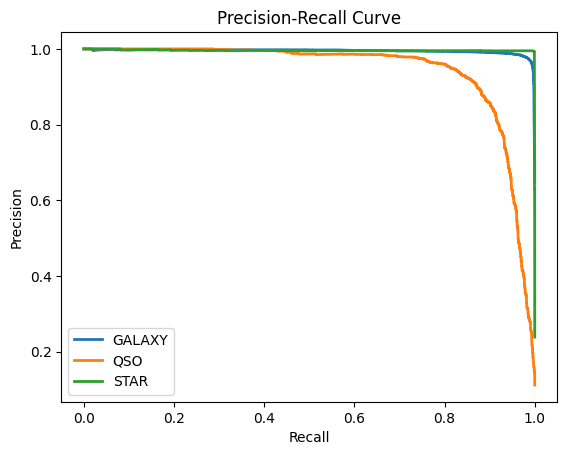

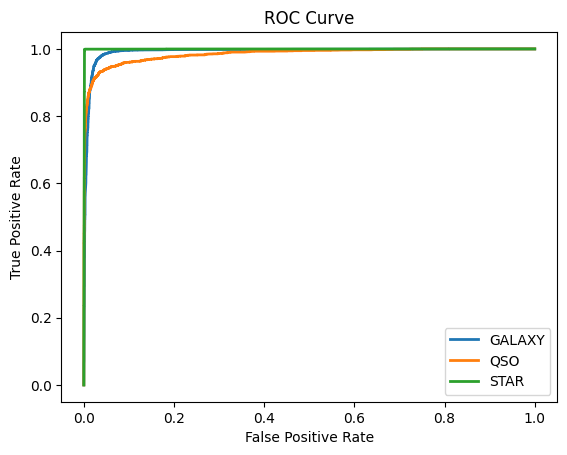

In [5]:
gbc_holdout = GradientBoostingClassifier()
gbc_holdout.fit(star_x_train, star_y_train)
evaluate_classification_model(gbc_holdout, star_x_test, star_y_test, class_labels)

The accuracy of the Gradient Boosting classifier is 0.973 which shows that it performs well in making predictions on the testing set, and gets the class right most of the time. Like the SVM classifier, the precision and recall are similar showing its ability to make predictions with a low number of false positives and false negatives. The F1-score (which is the harmonic mean of precision and recall) is also high at 0.953, which shows that the classifier is of a high quality. This point is backed up by the confusion matrix that demonstrates the classifier's impressive ability to correctly classify the majority of the testing set. This is especially true for the `star` class, in which the area under the precision-recall and ROC curves are almost maximised.

#### Train and evaluate a Gradient Boosting classifier using cross-validation <a class="anchor" id="Train-and-evaluate-a-Gradient-Boosting-classifier-using-cross-validation"></a>

Like in task 3.2, in order to gain a better understanding of the Gradient Boosting classifier's performance, cross-validation will be used as an additional evaluation step.

In [6]:
_ = perform_cross_validation(GradientBoostingClassifier(), star_X, star_Y)

Mean Accuracy: 0.9745833076509536
Standard Deviation: 0.0011797359793947948


The mean accuracy of the Gradient Boosting classifier is 0.975, with a standard deviation of 0.001 which shows that the performance is consistent across the folds. Despite the impressive performance achieved by the model, it will be interesting to see if it can be improved by performing hyperparameter optimisation.

#### Perform Gradient Boosting classifier hyperparameter tuning <a class="anchor" id="Perform-Gradient-Boosting-classifier-hyperparameter-tuning"></a>

The `tune_hyperparameters` method created in task 3.2 can be utilised to perform hyperparameter optimisation on the Gradient Boosting classifier. According to the [SciKit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) The hyperparameters that are commonly tuned for this type of classifier are:
- `learning_rate` which reduces the contribution of each tree in the classifier to improve its generalisation
- `n_estimators` which is the number of boosting stages that are performed during training
- `max_depth` which limits the number of nodes in each tree
- `min_samples_split` which is the minimum number of samples that is required before a node is split
- `min_samples_leaf` which is the minimum number of samples that is required before a node is considered a leaf

In [68]:
gbc_param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_gbc_params = tune_hyperparameters(GradientBoostingClassifier(), gbc_param_grid, star_X, star_Y)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters:
learning_rate = 0.1
max_depth = 5
min_samples_leaf = 4
min_samples_split = 5
n_estimators = 200


With the best hyperparameters stored in a dictionary, a new Gradient Boosting classifier can be created and evaluated using the `evaluate_classification_model` function.

In [7]:
gbc_tuned = GradientBoostingClassifier(**best_gbc_params)
gbc_tuned_scores = perform_cross_validation(gbc_tuned, star_X, star_Y)

Mean Accuracy: 0.976522243423885
Standard Deviation: 0.0012723298757545555


Clearly the performance of the classifier has improved after being tuned, as the mean accuracy across the folds has increased by approximately 0.002 to 0.977. The standard deviation has remained similar showing that the performance differs by a similar amount across the folds.

Accuracy: 0.9764644046019973
Precision: 0.9690913572906519
Recall: 0.9499256270956783
F1-score: 0.9589924433487212


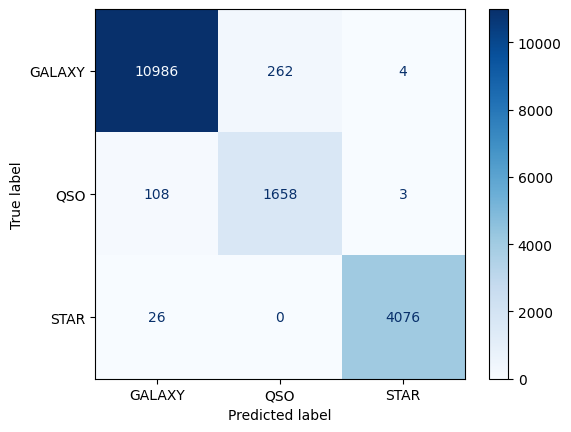

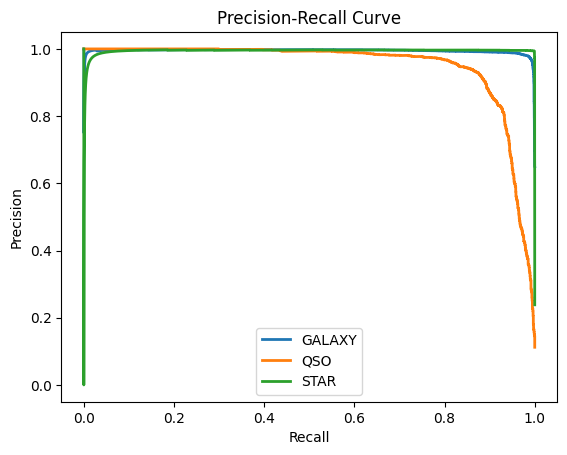

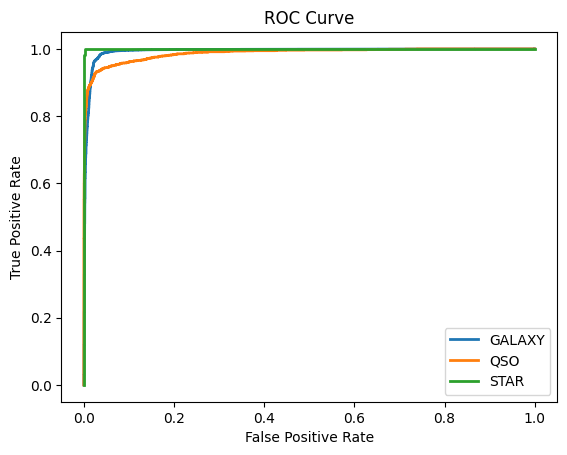

In [8]:
gbc_tuned.fit(star_x_train, star_y_train)
evaluate_classification_model(gbc_tuned, star_x_test, star_y_test, class_labels)

When comparing the evaluation metrics from the tuned model to the previous model, it is evident that the tuned model performs better in predicting the correct class in the star dataset. This is also reflected in confusion matrix which shows a decrease in the number of incorrectly labelled samples. In addition, the area under the precision-recall and ROC curves have clearly increased for the galaxy and quasar classes, showing that the tuned model is better at predicting these classes.

#### Import SVM classifier from task 3.2 <a class="anchor" id="Import-SVM-classifier-from-task-3.2"></a>

Next, we will import the SVM classifier that was created in task 3.2, then evaluate its performance using cross-validation so that a hypothesis test can be performed.

In [9]:
svc_tuned = create_tuned_star_svc()
svc_tuned_scores = perform_cross_validation(svc_tuned, star_X, star_Y)

Mean Accuracy: 0.9725392085013876
Standard Deviation: 0.001162952279931272


#### Use hypothesis testing to compare the performance of the two classifiers <a class="anchor" id="Use-hypothesis-testing-to-compare-the-performance-of-the-two-classifiers"></a>

The `perform_hypothesis_test` method created for this task will be used to perform a hypothesis test between the Gradient Boosting classifier and the SVM classifier. A significance level of 0.05 will be used to determine whether the difference in performance between the two classifiers is statistically significant because it is the conventional value used in statistical hypothesis testing.

In [10]:
perform_hypothesis_test(gbc_tuned_scores, svc_tuned_scores, significance_level=0.05)

T-Statistic: 27.064871213603794, P-Value: 6.216118160572331e-10
Assuming a significance level of 0.05, the null hypothesis is rejected, and the difference in performance is statistically significant


Assuming that there is no true difference in the performance of the two models, the p-value calculated means that there is a 0.0000000006% probability of observing a difference as extreme as the one that was observed. Evidently, the p-value was below the significance level of 0.05 which means that the difference in performance between the two classifiers is statistically significant. Hence, the tuned Gradient Boosting classifier can be considered to be a better performing model on the star dataset than the tuned SVM classifier as its mean accuracy was higher across the folds in cross-validation.

## GWP Dataset <a class="anchor" id="GWP-Dataset"></a>

Same as with the star dataset, the first step is to use one of the methods created in task 3.1 to load and preprocess the GWP dataset.

In [11]:
gwp_X, gwp_Y = preprocess_gwp_dataset('gwp_assessment.csv')

#### Train and evaluate a Multi-Layer Perceptron regressor using the holdout method <a class="anchor" id="Train-and-evaluate-a-Multi-Layer-Perceptron-regressor-using-the-holdout-method"></a>

Then, the dataset will be split into training and testing sets with an 80/20 split ratio using SciKit-Learn's `train_test_split` method.

In [12]:
gwp_x_train, gwp_x_test, gwp_y_train, gwp_y_test = create_train_test_split(gwp_X, gwp_Y)

Next, a Multi-Layer Perceptron regressor will be created and trained on the training set, then evaluated using the `evaluate_regression_model` function.

R^2 Score: 0.3373033053633606
Mean Absolute Error: 0.0912801104318043
Root Mean Squared Error: 0.13293780604221517


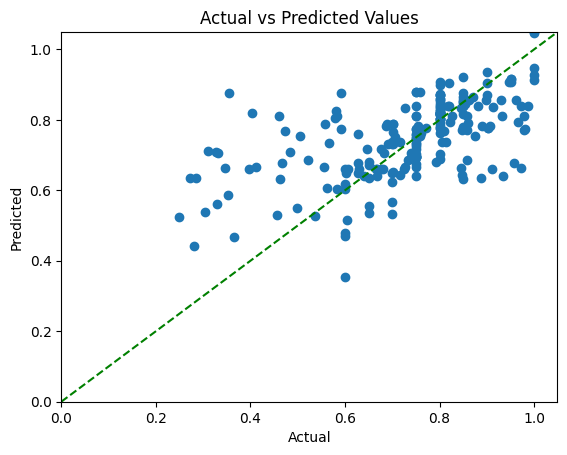

In [13]:
mlp_holdout = MLPRegressor()
mlp_holdout.fit(gwp_x_train, gwp_y_train)
evaluate_regression_model(mlp_holdout, gwp_x_test, gwp_y_test)

The Multi-Layer Perceptron regressor achieved an R<sup>2</sup> score of 0.337 which is much lower than that achieved by the regressor trained in task 3.2. Additionally, the root mean squared error is higher which means that on average, the model's productivity predictions are further away from the actual values.

#### Train and evaluate a Multi-Layer Perceptron Regressor using cross-validation <a class="anchor" id="Train-and-evaluate-a-Multi-Layer-Perceptron-regressor-using-cross-validation"></a>

Cross-validation will then be used to evaluate the RMSE of the Perceptron regressor across several folds.

In [14]:
_ = perform_cross_validation(MLPRegressor(), gwp_X, gwp_Y)

Mean RMSE: 0.1435288344805209
Standard Deviation: 0.025843309372185045


The mean RMSE of the model across the folds was 0.144 which is relatively high compared to the previous regressor. Additionally, the standard deviation of the scores was 0.026 which means that the performance of the Multi-Layer Perceptron regressor varies in each fold, which could be partially attributed to the random initialisation of the weights in the model.

#### Perform Multi-Layer Perceptron Regressor hyperparameter tuning <a class="anchor" id="Perform-Multi-Layer-Perceptron-regressor-hyperparameter-tuning"></a>

To attempt to improve the performance of the Multi-Layer Perceptron regressor, hyperparameter tuning will be performed next. Common hyperparameters that are tuned in Multi-Layer Perceptron models include:
- `hidden_layer_sizes` which represents the number of neurons in each hidden layer of the perceptron
- `activation` which represents the activation function used in the perceptron
- `solver` which represents the optimisation algorithm used to train the perceptron
- `alpha` which represents the regularisation strength (L2 penalty) and is used to prevent the model overfitting the training data
- `learning_rate` which represents the rate at which the model learns the training data

In [20]:
mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

best_mlp_params = tune_hyperparameters(MLPRegressor(), mlp_param_grid, gwp_X, gwp_Y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters:
activation = tanh
alpha = 0.05
hidden_layer_sizes = (50, 50, 50)
learning_rate = adaptive
solver = adam


Now that the optimal hyperparameters have been saved to the dictionary `best_mlp_params`, a new Multi-Layer Perceptron regressor will be created that uses these hyperparameters and its performance will be evaluated using cross-validation.

In [16]:
mlp_tuned = MLPRegressor(**best_mlp_params)
mlp_tuned_scores = perform_cross_validation(mlp_tuned, gwp_X, gwp_Y)

Mean RMSE: 0.1385011518714404
Standard Deviation: 0.02380286574143126


The evaluation metrics generated demonstrate that the performance of the Multi-Layer Perceptron has generally improved as the mean RMSE has decreased to 0.139. Additionally, the standard deviation of the RMSE across the folds has decreased to 0.024 which is a slight improvement.

R^2 Score: 0.4571116761119388
Mean Absolute Error: 0.07845523656118975
Root Mean Squared Error: 0.12032236384232307


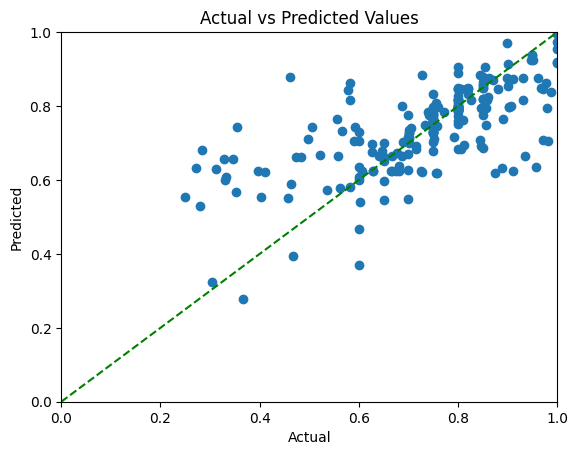

In [17]:
mlp_tuned.fit(gwp_x_train, gwp_y_train)
evaluate_regression_model(mlp_tuned, gwp_x_test, gwp_y_test)

This model shows the potential of hyperparameter tuning to achieve higher R<sup>2</sup> scores, as well as lower root mean squared errors. The actual vs predicted plot also shows that the model is able to predict the productivity of the workers more accurately than the un-tuned model, as the points lie slightly closer to the line y=x.

#### Import Random Forest regressor from task 3.2 <a class="anchor" id="Import-Random-Forest-regressor-from-task-3.2"></a>

Next, the tuned Random Forest regressor trained in task 3.2 will be imported and evaluated using cross-validation.

In [18]:
rf_tuned = create_tuned_gwp_rf()
rf_tuned_scores = perform_cross_validation(rf_tuned, gwp_X, gwp_Y)

Mean RMSE: 0.1322158560814714
Standard Deviation: 0.024599110505691562


#### Use hypothesis testing to compare the performance of the two regressors <a class="anchor" id="Use-hypothesis-testing-to-compare-the-performance-of-the-two-regressors"></a>

Again, the `perform_hypothesis_test` function will be used to compare the performance of the two regressors. The null hypothesis is that the performance of the Multi-Layer Perceptron regressor and the Random Forest regressor are not significantly different, and the alternative hypothesis is that the performance of the models are significantly different. A significance level of 0.05 will be used.

In [21]:
perform_hypothesis_test(mlp_tuned_scores, rf_tuned_scores, significance_level=0.05)

T-Statistic: 2.4094819909271012, P-Value: 0.03928237472828697
Assuming a significance level of 0.05, the null hypothesis is rejected, and the difference in performance is statistically significant


The p-value computed indicates that there was a 3.9% chance of observing a difference as extreme as the one that was observed. Since the p-value was less than the significance level of 0.05, there is enough evidence to reject the null hypothesis. This means that the performance (RMSE) of the tuned Multi-Layer Perceptron and Random Forest regressors can be considered significantly different when trained on the GWP dataset, and more specifically the Random Forest regressor is significantly better than the Multi-Layer Perceptron regressor as the mean RMSE of the Random Forest regressor is lower.

## Markdown Question <a class="anchor" id="Markdown-Question"></a>

*What was the hypothesis you rejected for both datasets in this task? How does p-value affect your decision?*

The null hypothesis in both scenarios was that the performance of the two models compared in each case were not significantly different. The alternative hypothesis was that the performance of the models compared were significantly different. In this notebook, the p-value indicates the probability of observing a difference in performance (through the model scores) if there is actually no difference in performance. If the p-value lies below a significance level, then the observed difference in performance is considered statistically significant and unlikely to have occurred by chance if the null hypothesis is true. Thus, the null hypothesis is rejected and the alternative hypothesis is accepted. If the p-value doesn't lie below the significance level, it suggests that the observed difference is likely to have occurred by chance if the null hypothesis is true, and therefore the null hypothesis cannot be rejected. The first hypothesis test performed between the SVM and Gradient Boosting classifiers resulted in a p-value below the significance level (0.05), meaning that the accuracy of the models could be considered significantly different. Also, the RMSE of the Random Forest and Multi-Layer Perceptron regressors could be considered significantly different as the p-value was less than the significance level.